# Projeto ICD - Fórmula 1
### Caio Araújo e William Xavier

## Quais pilotos venceram mais corridas desde 1950 até 2021 ?

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set_palette('Set2')

results = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")
drivers = pd.read_csv("../../caiov/ICD/projeto_csv/drivers.csv")

In [2]:
results = results.drop(["statusId", "points", "positionText", "number", "position", "milliseconds"], axis=1)
results = results.rename(columns={"positionOrder":"Vitórias_P"})
results = results[results.Vitórias_P == 1]

In [3]:
drivers = drivers.loc["0":,"driverId":"nationality"]
drivers["Pilotos"] = drivers["forename"] + " " + drivers["surname"]
drivers = drivers.drop(["dob","number","forename","surname"], axis=1)
drivers = drivers.reindex(columns=['driverId','driverRef','code','Pilotos','nationality'])

In [4]:
drivers_results = pd.merge(drivers,results, on="driverId")

drivers_wins = drivers_results.groupby("Pilotos").count()
drivers_wins = drivers_wins.sort_values(by="Vitórias_P", ascending=False)[["Vitórias_P"]]
d_w_barplot = drivers_wins.iloc[:10]
drivers_wins.iloc[:15]

,Vitórias_P
Pilotos,
Lewis Hamilton,96
Michael Schumacher,91
Sebastian Vettel,53
Alain Prost,51
Ayrton Senna,41
Fernando Alonso,32
Nigel Mansell,31
Jackie Stewart,27
Niki Lauda,25


## Medidas de Centralidade e Dispersão

In [5]:
Medidas_P = {"Média": drivers_wins["Vitórias_P"].mean(),
                  "Mediana": drivers_wins["Vitórias_P"].median(),
                  "Desvio Padrão": drivers_wins["Vitórias_P"].std()}
medidas_p = pd.Series(Medidas_P)

d_w_medidas = pd.DataFrame({"Vitórias_P": medidas_p})
d_w_medidas

,Vitórias_P
Média,9.445455
Mediana,4.000000
Desvio Padrão,15.269798


## Boxplot

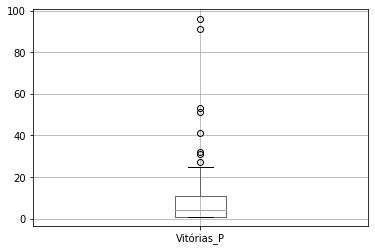

In [6]:
drivers_wins.boxplot(column="Vitórias_P")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Pilotos Vencedores')

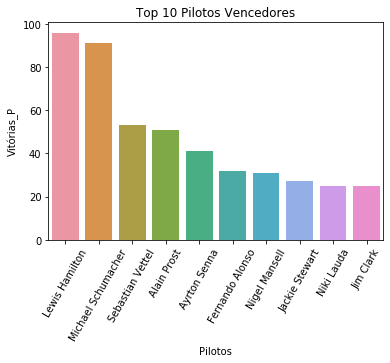

In [7]:
d_w_barplot = d_w_barplot.reset_index()
sns.barplot(data=d_w_barplot, x="Pilotos", y="Vitórias_P")
plt.xticks(rotation=60)
plt.title("Top 10 Pilotos Vencedores")

## Quais montadoras/equipes venceram mais corridas ?

In [8]:
teams = pd.read_csv("../../caiov/ICD/projeto_csv/constructors.csv")

In [9]:
teams_results = pd.merge(teams,results, on="constructorId")
teams_results = teams_results.drop(["constructorRef","url"], axis=1)

In [10]:
teams_results = teams_results.rename(columns={"name":"Equipes"})
teams_results = teams_results.rename(columns={"constructorId":"Vitórias_E"})

In [11]:
teams_wins = teams_results.groupby("Equipes").count()
teams_wins = teams_wins.sort_values(by="Vitórias_E", ascending=False)[["Vitórias_E"]]
t_w_barplot = teams_wins.iloc[:10]
teams_wins.iloc[:15]

,Vitórias_E
Equipes,
Ferrari,239
McLaren,178
Mercedes,116
Williams,114
Red Bull,64
Team Lotus,45
Renault,35
Benetton,27
Brabham,23


## Medidas de Centralidade e Dispersão

In [12]:
Medidas_E = {"Média": teams_wins["Vitórias_E"].mean(),
                  "Mediana": teams_wins["Vitórias_E"].median(),
                  "Desvio Padrão": teams_wins["Vitórias_E"].std()}
medidas_e = pd.Series(Medidas_E)

t_w_medidas = pd.DataFrame({"Vitórias_E": medidas_e})
t_w_medidas

,Vitórias_E
Média,22.586957
Mediana,4.000000
Desvio Padrão,47.768226


## Boxplot

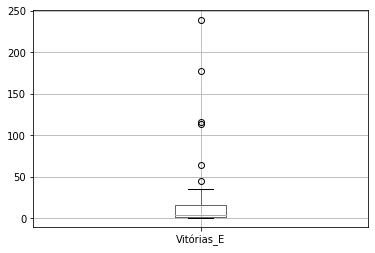

In [13]:
teams_wins.boxplot(column="Vitórias_E")

## Gráfico de Barra

Text(0.5, 1.0, 'Top 10 Equipes Vencedores')

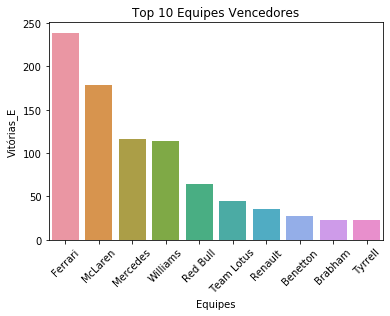

In [14]:
t_w_barplot = t_w_barplot.reset_index()
sns.barplot(data=t_w_barplot, x="Equipes", y="Vitórias_E")
plt.xticks(rotation=45)
plt.title("Top 10 Equipes Vencedores")

## Acidentes + Colisões por Temporada

In [15]:
races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
estatistica = pd.read_csv("../../caiov/ICD/projeto_csv/status.csv")
resultados = pd.read_csv("../../caiov/ICD/projeto_csv/results.csv")

df_acidentes = resultados[(resultados.statusId == 3) | (resultados.statusId == 4)]
df_acidentes = df_acidentes.drop(["points", "position", "positionText", "number", "time", "milliseconds", 
                            "fastestLap", "fastestLapTime", "fastestLapSpeed","laps", "rank", "positionOrder"], axis=1)

In [16]:
newdata = pd.merge(races, df_acidentes, on="raceId")
newdata = newdata.drop(["url", "grid", "time", "round", "date", "resultId",
                        "driverId","raceId", "circuitId", "constructorId","name","statusId"], axis=1)
newdata = newdata.rename(columns={"year":"Temporada"})

q_acidentes = np.full((1834), 1)
newdata["Acidentes"]= q_acidentes

newdata = newdata.sort_values(by="Temporada")
newdata = newdata.reset_index(drop=True)
newdata = newdata.groupby("Temporada").sum()
newdata.iloc[60:]

,Acidentes
Temporada,
2010,42
2011,30
2012,43
2013,23
2014,23
2015,18
2016,20
2017,26
2018,26


## Medidas de Centralidade e Dispersão

In [17]:
Medidas_A = {"Média": newdata["Acidentes"].mean(),
                  "Mediana": newdata["Acidentes"].median(),
                  "Desvio Padrão": newdata["Acidentes"].std()}
medidas_a = pd.Series(Medidas_A)

d_a_medidas = pd.DataFrame({"Acidentes": medidas_a})
d_a_medidas

,Acidentes
Média,25.472222
Mediana,25.000000
Desvio Padrão,12.844654


## Boxplot

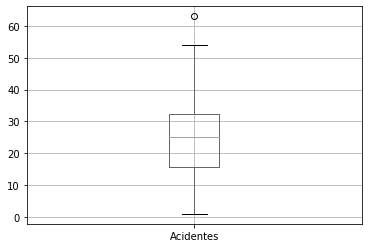

In [18]:
newdata.boxplot(column="Acidentes")

## Gráfico de Linha

Text(0.5, 1.0, 'Acidentes por temporada')

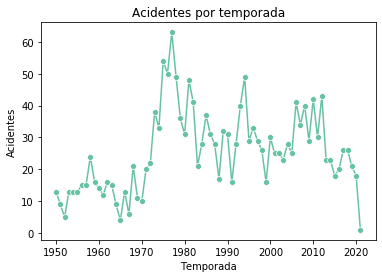

In [19]:
newdata = newdata.reset_index()
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B570D2DD48>]],
      dtype=object)

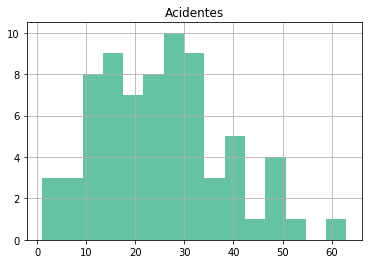

In [20]:
newdata.hist(column="Acidentes", bins=15)

## Gráfico de dispersão (Agrupamento)

In [21]:
newdata = newdata.reset_index()

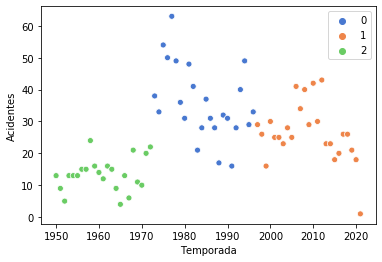

In [22]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(newdata)
sns.scatterplot(data=newdata, x="Temporada", y="Acidentes", hue=kmeans.labels_, palette="muted")

# DataFrame - Fórmula 1

In [23]:
pd.options.display.float_format = '{:.2f}'.format

races = pd.read_csv("../../caiov/ICD/projeto_csv/races.csv")
races = races.drop(["time","url"], axis=1)

teams_results2 = pd.merge(results,teams, on="constructorId")
teams_results2 = teams_results2.drop(["constructorRef","url", "Vitórias_P"], axis=1)
teams_results2 = teams_results2.drop(["nationality","raceId","resultId","grid","laps",
                                      "time","fastestLap","rank","fastestLapTime","fastestLapSpeed"], axis=1)
teams_results2 #(F15)

drivers_results2 = pd.merge(results, drivers, on="driverId")
drivers_results2 = drivers_results2.rename(columns={"Vitórias_P":"Posição_Final"})
drivers_results2 #(F10)

t_d_results = pd.merge(teams_results2,drivers_results2, on=["driverId","constructorId"])
t_d_results = t_d_results.drop(["rank","fastestLap","driverRef","laps","resultId"],axis=1)
t_d_results = t_d_results.reindex(columns=["raceId","driverId","Pilotos","code","nationality","constructorId","name",
                                           "grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])

t_d_results = t_d_results.rename(columns={"name":"Montadoras"})

formula_1 = pd.merge(t_d_results,races, on="raceId")
formula_1 = formula_1.reindex(columns=["raceId","round","circuitId","name","date","year","driverId","Pilotos","code","nationality",
                                       "Montadoras","constructorId","grid","Posição_Final","time","fastestLapTime","fastestLapSpeed"])
formula_1 = formula_1.drop_duplicates()
formula_1 = formula_1.sort_values(by="date")

# Porcentagem Pole-Vitória


In [24]:
soma_p = formula_1['Posição_Final'].sum()

soma_grid = formula_1[formula_1.grid == 1]
soma_grid = soma_grid["grid"].count()
porc = (soma_grid * 100) / soma_p


soma_grid_2 = formula_1[formula_1.grid == 2]
soma_grid_2 = soma_grid_2["grid"].count()
porc_2 = (soma_grid_2 * 100) / soma_p


soma_grid_3 = formula_1[formula_1.grid == 3]
soma_grid_3 = soma_grid_3["grid"].count()
porc_3 = (soma_grid_3 * 100) / soma_p

In [25]:
valores_dict = {"Q1": porc, "Q2": porc_2, "Q3": porc_3}
valores_dict_2 = {"Q1": "1°- 1°", "Q2": "2°- 1°", "Q3": "3°- 1°"}

valores = pd.Series(valores_dict)
valores_2 = pd.Series(valores_dict_2)

porc_valores = pd.DataFrame({"Saída-Chegada": valores_2 ,"Porcentagem" : valores_dict})
porc_valores

,Saída-Chegada,Porcentagem
Q1,1°- 1°,41.87
Q2,2°- 1°,23.97
Q3,3°- 1°,12.32


# Análise Tempo (OK)

Análise da variação das velocidades em diferentes circuitos ano a ano.

In [26]:
formula_1_speed =  formula_1
formula_1_speed = formula_1_speed.drop(["round","driverId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)

formula_1_speed = formula_1_speed[(formula_1_speed.circuitId == 6) | (formula_1_speed.circuitId == 14) | 
                                  (formula_1_speed.circuitId == 18) | (formula_1_speed.circuitId == 9)]

formula_1_speed = formula_1_speed.drop(14186)
formula_1_speed = formula_1_speed.sort_values(by="circuitId")

formula_1_speed_t = formula_1_speed["time"]
formula_1_speed_dt = pd.to_datetime(formula_1_speed_t, format='%H:%M:%S.%f', errors='ignore')
formula_1_speed_seconds = (formula_1_speed_dt.dt.hour*60+formula_1_speed_dt.dt.minute)*60 + formula_1_speed_dt.dt.second
formula_1_speed["Seconds"] = formula_1_speed_seconds

Text(0.5, 1.0, 'Análise Tempos')

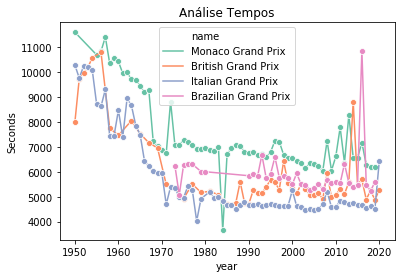

In [27]:
sns.lineplot(data=formula_1_speed, x="year", y="Seconds", hue="name", marker="o")
plt.title("Análise Tempos")

Análise: Podemos observar que aproximadamente no ano de 2010 houve uma mudança brusca na variação dos tempos que estavam em constante diminuição. Tal acontecimento foi ocasionado por uma série de mudanças em algumas regras da Fórmula 1, como: 

* **Volta da regra de 107%** (*Durante a qualificação, o piloto que não efetuar uma volta dentro de 107% do menor tempo na primeira sessão de qualificação não pode começar a corrida*);
* **Proibição de ordens de equipe** (*Equipe não pode exigir ultrapassagens para favorecer um determinado piloto*);  
* **Novas normas técnicas impostas pela pirelli;**  
* **Mudanças na aerodinâmica dos carros;**  
* **Leve aumento do peso mínimo dos veículos;**  
* **Impedimento de acessar o circuito 9 horas antes da primeira sessão do dia.**

Essas mudanças favoreceram a segurança dos pilotos e de todas as pessoas envolvidas na organização da corrida, como pode ser observado no gráfico abaixo:

Text(0.5, 1.0, 'Acidentes por temporada')

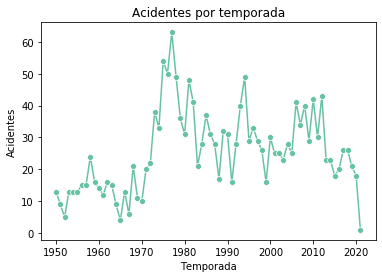

In [28]:
sns.lineplot(data=newdata, x="Temporada", y="Acidentes", marker="o")
plt.title("Acidentes por temporada")

Houve uma diminuição na quantidade de acidentes por volta da temporada de 2013, demostrando a eficácia das novas normas impostas pela FIA (Federação Internacional do Automóvel). Em suma, os carros se tornaram levemente mais lentos, mas as corridas se tornaram mais seguras, o que eticamente foi a decisão mais correta para evitar a morte de profissionais deste esporte que vem nos impressionando ao longo dos anos com tamanha velocidade e adrenalina.

In [ ]:
#Organizar depois

for i in range(3):
    Porcentagem_t = []
    string = str(porc_valores["Porcentagem"][i]) + "%"
    Porcentagem_t.append(string)
    
    porc_valores.insert(loc=0, column="Porcentagem_t", value=Porcentagem_t)

# Dados Monaco (1950-1968) e (2005-2019)

## Monaco (1950-1968)

In [29]:
Monaco_1 = formula_1[formula_1.circuitId == 6]
Monaco_1 = Monaco_1[Monaco_1.year <= 1968]
Monaco_1 = Monaco_1.sort_values(by="time")
Monaco_1 = Monaco_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monaco_1 = Monaco_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monaco_1_time = Monaco_1["time"]
Monaco_1_dt = pd.to_datetime(Monaco_1_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_1_seconds = (Monaco_1_dt.dt.hour*60+Monaco_1_dt.dt.minute)*60 + Monaco_1_dt.dt.second
Monaco_1["Seconds"] = Monaco_1_seconds
Monaco_1

,name,date,year,Pilotos,nationality,Montadoras,grid,Posição_Final,time,Seconds
0,Monaco Grand Prix,1968-05-26,1968,Graham Hill,British,Lotus-Ford,1,1,2:00:32.3,7232
1,Monaco Grand Prix,1966-05-22,1966,Jackie Stewart,British,BRM,3,1,2:33:10.5,9190
2,Monaco Grand Prix,1967-05-07,1967,Denny Hulme,New Zealander,Brabham-Repco,4,1,2:34:34.3,9274
3,Monaco Grand Prix,1965-05-30,1965,Graham Hill,British,BRM,1,1,2:37:39.6,9459
4,Monaco Grand Prix,1964-05-10,1964,Graham Hill,British,BRM,3,1,2:41:19.5,9679
5,Monaco Grand Prix,1963-05-26,1963,Graham Hill,British,BRM,2,1,2:41:49.7,9709
6,Monaco Grand Prix,1961-05-14,1961,Stirling Moss,British,Lotus-Climax,1,1,2:45:50.1,9950
7,Monaco Grand Prix,1962-06-03,1962,Bruce McLaren,New Zealander,Cooper-Climax,3,1,2:46:29.7,9989
8,Monaco Grand Prix,1958-05-18,1958,Maurice Trintignant,French,Cooper,5,1,2:52:27.9,10347
9,Monaco Grand Prix,1960-05-29,1960,Stirling Moss,British,Team Lotus,1,1,2:53:45.5,10425


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

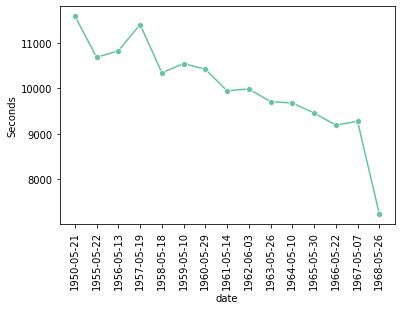

In [30]:
sns.lineplot(data=Monaco_1, x="date", y="Seconds", marker="o")
plt.xticks(rotation=90)

## Monaco (2005-2019)

In [31]:
Monaco_2 = formula_1[formula_1.circuitId == 6]
Monaco_2 = Monaco_2[Monaco_2.year >= 2005]
Monaco_2 = Monaco_2.sort_values(by="time")
Monaco_2 = Monaco_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monaco_2 = Monaco_2.reset_index(drop=True)

Monaco_2_time = Monaco_2["time"]
Monaco_2_dt = pd.to_datetime(Monaco_2_time, format='%H:%M:%S.%f', errors='ignore')
Monaco_2_seconds = (Monaco_2_dt.dt.hour*60+Monaco_2_dt.dt.minute)*60 + Monaco_2_dt.dt.second
Monaco_2["Seconds"] = Monaco_2_seconds
Monaco_2

,name,date,year,Pilotos,code,nationality,Montadoras,grid,Posição_Final,time,Seconds
0,Monaco Grand Prix,2007-05-27,2007,Fernando Alonso,ALO,Spanish,McLaren,1,1,1:40:29.329,6029
1,Monaco Grand Prix,2009-05-24,2009,Jenson Button,BUT,British,Brawn,1,1,1:40:44.282,6044
2,Monaco Grand Prix,2018-05-27,2018,Daniel Ricciardo,RIC,Australian,Red Bull,1,1,1:42:54.807,6174
3,Monaco Grand Prix,2019-05-26,2019,Lewis Hamilton,HAM,British,Mercedes,1,1,1:43:28.437,6208
4,Monaco Grand Prix,2006-05-28,2006,Fernando Alonso,ALO,Spanish,Renault,1,1,1:43:43.116,6223
5,Monaco Grand Prix,2017-05-28,2017,Sebastian Vettel,VET,German,Ferrari,2,1,1:44:44.340,6284
6,Monaco Grand Prix,2005-05-22,2005,Kimi Räikkönen,RAI,Finnish,McLaren,1,1,1:45:15.556,6315
7,Monaco Grand Prix,2012-05-27,2012,Mark Webber,WEB,Australian,Red Bull,1,1,1:46:06.557,6366
8,Monaco Grand Prix,2015-05-24,2015,Nico Rosberg,ROS,German,Mercedes,2,1,1:49:18.420,6558
9,Monaco Grand Prix,2014-05-25,2014,Nico Rosberg,ROS,German,Mercedes,1,1,1:49:27.661,6567


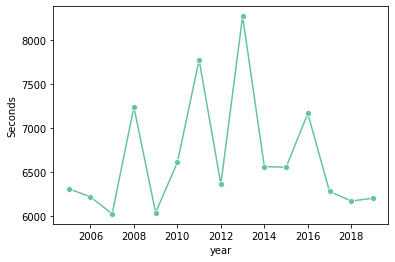

In [32]:
sns.lineplot(data=Monaco_2, x="year", y="Seconds", marker="o")

# Comparação Velocidades

In [ ]:
from scipy.stats import zscore

In [ ]:
z_score_1 = zscore(Monaco_1["Seconds"])
z_score_1

In [ ]:
z_score_2 = zscore(Monaco_2["Seconds"])
z_score_2

In [33]:
Monaco_a = {"Média": Monaco_1["Seconds"].mean(),
                  "Desvio Padrão": Monaco_1["Seconds"].std(),
                       "Fastest Pilot": Monaco_1["Seconds"][0]}

Monaco_b = {"Média": Monaco_2["Seconds"].mean(),
                  "Desvio Padrão": Monaco_2["Seconds"].std(),
                       "Fastest Pilot": Monaco_2["Seconds"][0]}

medidas_a = pd.Series(Monaco_a)
medidas_b = pd.Series(Monaco_b)

d_ab_medidas = pd.DataFrame({"Monaco_1": medidas_a, "Monaco_2": medidas_b})
d_ab_medidas

,Monaco_1,Monaco_2
Média,10022.40,6656.13
Desvio Padrão,1056.93,666.72
Fastest Pilot,7232.00,6029.00


In [ ]:
import scipy.stats as stats
import math
x_values = [6851.7,7908.6,8965.5,10022.4,11079.3,12136.2,13193.4]

mu = d_ab_medidas["Monaco_1"][0]
variance = d_ab_medidas["Monaco_1"][1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xticks(x_values)
plt.show()

In [ ]:
value = np.random.normal(loc=10022.4,scale=1000,size=1000)
sns.distplot(value)

In [ ]:
mu = d_ab_medidas["Monaco_2"][0]
variance = d_ab_medidas["Monaco_2"][1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [ ]:
Monaco_a = {"Piloto": Monaco_1["Pilotos"][0],
                  "Tempo": Monaco_1["time"][0],
                       "Z-Score": Monaco_1["Seconds"][0]}

Monaco_b = {"Piloto": Monaco_2["Pilotos"][0],
                  "Tempo": Monaco_2["time"][0],
                       "Z-Score": Monaco_2["Seconds"][0]}

medidas_a = pd.Series(Monaco_a)
medidas_b = pd.Series(Monaco_b)

battle_a_b = pd.DataFrame({"Monaco_1": medidas_a, "Monaco_2": medidas_b})
battle_a_b

# Dados Monza (1950-1964) e (2006-2020)

## Monza (1950-1964)

In [ ]:
Monza_1 = formula_1[formula_1.circuitId == 14]
Monza_1 = Monza_1[Monza_1.year <= 1964]
Monza_1 = Monza_1.sort_values(by="date")
Monza_1 = Monza_1.drop(["raceId","round","driverId","circuitId",
                          "code","constructorId","fastestLapTime","fastestLapSpeed"], axis=1)
Monza_1 = Monza_1.reset_index(drop=True)

#Transformando tempo em str para segundos.
Monza_1_time = Monza_1["time"]
Monza_1_dt = pd.to_datetime(Monza_1_time, format='%H:%M:%S.%f', errors='ignore')
Monza_1_seconds = (Monza_1_dt.dt.hour*60+Monza_1_dt.dt.minute)*60 + Monza_1_dt.dt.second
Monza_1["Seconds"] = Monza_1_seconds
Monza_1

## Monza (2006-2020)

In [ ]:
Monza_2 = formula_1[formula_1.circuitId == 14]
Monza_2 = Monza_2[Monza_2.year >= 2006]
Monza_2 = Monza_2.sort_values(by="date")
Monza_2 = Monza_2.drop(["raceId","round","driverId","circuitId","constructorId","fastestLapSpeed","fastestLapTime"], axis=1)
Monza_2 = Monza_2.reset_index(drop=True)

Monza_2_time = Monza_2["time"]
Monza_2_dt = pd.to_datetime(Monza_2_time, format='%H:%M:%S.%f', errors='ignore')
Monza_2_seconds = (Monza_2_dt.dt.hour*60+Monza_2_dt.dt.minute)*60 + Monza_2_dt.dt.second
Monza_2["Seconds"] = Monza_2_seconds
Monza_2